**Deep Learning with Convolutional Neural Networks (CNNs) using CIFAR-10 dataset**

In [99]:
# importing of modules for CNN using CIFAR-10 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

**Defining the hyperparameters which we will be changing to analyze the performance**

In [93]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

**Loading and preparation of the CIFAR-10 training set**

In [94]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3 
IMG_ROWS = 32
IMG_COLS = 32

#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')/255
input_X_test = input_X_test.astype('float32')/255



input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation one of the sample of CIFAR-10 images**

Sample input image: [[[0.10980392 0.09803922 0.03921569]
  [0.14509805 0.13333334 0.07450981]
  [0.14901961 0.13725491 0.07843138]
  ...
  [0.29803923 0.2627451  0.15294118]
  [0.31764707 0.28235295 0.16862746]
  [0.33333334 0.29803923 0.18431373]]

 [[0.12941177 0.10980392 0.05098039]
  [0.13333334 0.11764706 0.05490196]
  [0.1254902  0.10588235 0.04705882]
  ...
  [0.37254903 0.32156864 0.21568628]
  [0.3764706  0.32156864 0.21960784]
  [0.33333334 0.28235295 0.1764706 ]]

 [[0.15294118 0.1254902  0.05882353]
  [0.15686275 0.12941177 0.06666667]
  [0.22352941 0.19607843 0.12941177]
  ...
  [0.3647059  0.29803923 0.20392157]
  [0.41960785 0.34901962 0.25882354]
  [0.37254903 0.3019608  0.21176471]]

 ...

 [[0.3254902  0.28627452 0.20392157]
  [0.34117648 0.3019608  0.21960784]
  [0.32941177 0.2901961  0.20392157]
  ...
  [0.3882353  0.3647059  0.27450982]
  [0.3529412  0.32941177 0.23921569]
  [0.31764707 0.29411766 0.20392157]]

 [[0.34509805 0.28235295 0.2       ]
  [0.3529412  0.2

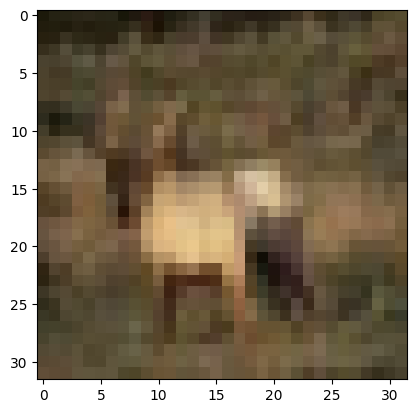

In [6]:
# visualisation of the numerical vector and 2D colour plot of a sample CIFAR imnage 2
Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

**Defining a Base CNN model**

convolutional layer with number of filters =32, kernel_size 3, padding = ‘same’ , activation function = ‘relu’ + maxpool layer with pool_size = (2,2) + Dropout layer with dropout rate = 0.25 
The final classification layers will use the standard: 
Flatten layer + Dense layer with number of neurons = 512, activation function = ‘relu’ + Dropout layer with dropout rate = 0.5 + Dense layer with number of neurons= no of classification classes , activation function =’softmax’


In [48]:
# a simple Convolutional Network definition and model compilation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

c:\Users\Win10\Desktop\python_projects\MLP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,200,842 (16.02 MB)

 Trainable params: 4,200,842 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

**Training and evaluting the Base CNN** 

In [49]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.2566 - loss: 2.2285 - val_accuracy: 0.4689 - val_loss: 1.5188
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.4701 - loss: 1.4934 - val_accuracy: 0.5247 - val_loss: 1.3347
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - accuracy: 0.5294 - loss: 1.3241 - val_accuracy: 0.5305 - val_loss: 1.3275
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.5657 - loss: 1.2133 - val_accuracy: 0.6062 - val_loss: 1.1356
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5957 - loss: 1.1405 - val_accuracy: 0.6028 - val_loss: 1.1262
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.6182 - loss: 1.0823 - val_accuracy: 0.6338 - val_loss: 1.0573
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.6433 - loss: 1.0132 - val_accuracy: 0.6377 - val_loss: 1.0433
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.6581 - loss: 0.9745 - 

**Analysis of the results with Visualization**

We will visualize the performance of the model by plotting the train and test accuracy against the number of epochs. We will also plot the loss against the number of epochs

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6631 - loss: 1.0587
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


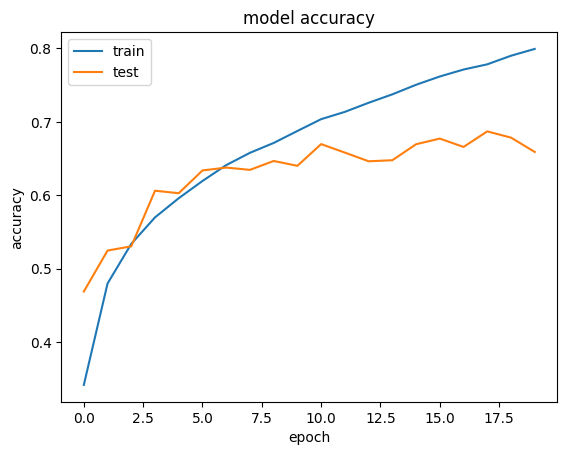

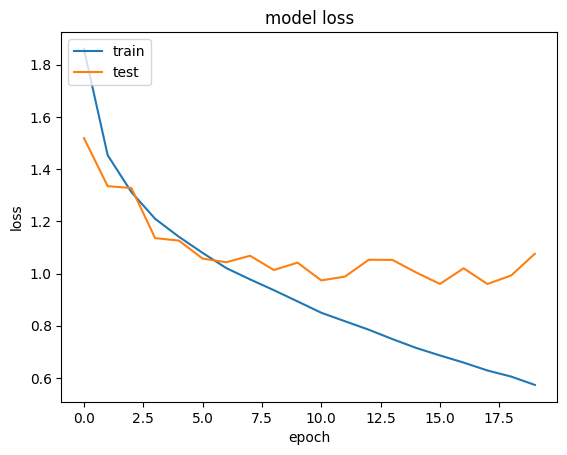

In [50]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


A deeper CNN
-------------
Since the simple CNN's performance was not satisfactory, we will develop a more intricate CNN with

Batch_size =128,  epoch = 20 , learning_rate = 0.001, Optimizer = RMSprop(), VALIDATION_SPLIT = 0.2


In [54]:
# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()
 


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_59 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_60 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_61 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_62 (Activation)      │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_63 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,282 (790.16 KB)

 Trainable params: 202,282 (790.16 KB)

 Non-trainable params: 0 (0.00 B)

**Let's evaluate this model**

In [55]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 114ms/step - accuracy: 0.1984 - loss: 2.1240 - val_accuracy: 0.3463 - val_loss: 1.7482
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.3507 - loss: 1.7491 - val_accuracy: 0.4472 - val_loss: 1.5191
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.4316 - loss: 1.5487 - val_accuracy: 0.5105 - val_loss: 1.3586
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.4769 - loss: 1.4296 - val_accuracy: 0.5080 - val_loss: 1.3549
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.5147 - loss: 1.3471 - val_accuracy: 0.5630 - val_loss: 1.2233
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.5421 - loss: 1.2765 - val_accuracy: 0.5757 - val_loss: 1.1837
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 136ms/step - accuracy: 0.5637 - loss: 1.2194 - val_accuracy: 0.5942 - val_loss: 1.1568
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.5809 - loss: 1

**Analyzing the Deeper CNN results**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


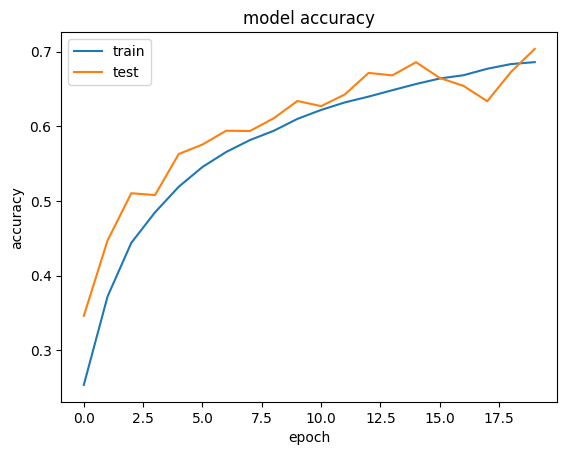

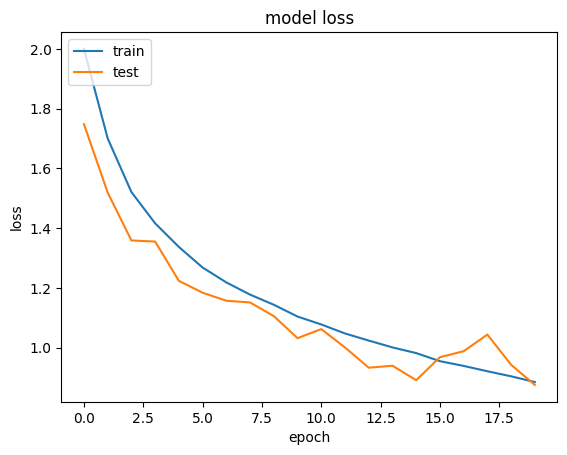

In [56]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Updating the batch size from 128 to 256 and run the model. Updating the batch size will help in better geralization, improve efficiency, and reduce noice**

In [23]:
BATCH_SIZE = 256
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 227ms/step - accuracy: 0.7126 - loss: 0.8205 - val_accuracy: 0.6554 - val_loss: 1.0052
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 241ms/step - accuracy: 0.7181 - loss: 0.8085 - val_accuracy: 0.7121 - val_loss: 0.8214
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - accuracy: 0.7202 - loss: 0.7904 - val_accuracy: 0.7135 - val_loss: 0.8299
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.7270 - loss: 0.7808 - val_accuracy: 0.7192 - val_loss: 0.8042
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.7353 - loss: 0.7585 - val_accuracy: 0.7134 - val_loss: 0.8347
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - accuracy: 0.7272 - loss: 0.7691 - val_accuracy: 0.7128 - val_loss: 0.8348
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 274ms/step - accuracy: 0.7346 - loss: 0.7515 - val_accuracy: 0.7048 - val_loss: 0.8546
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.7375 - loss: 0

**Evaluate the model with updated batch size**

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7371 - loss: 0.7608

Test score/loss: 0.7628623843193054
Test accuracy: 0.7401000261306763
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


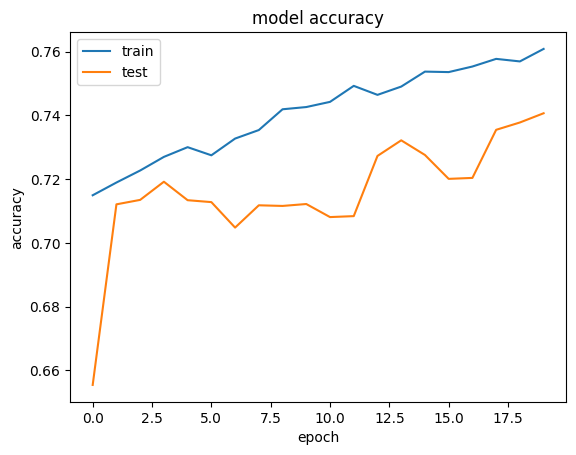

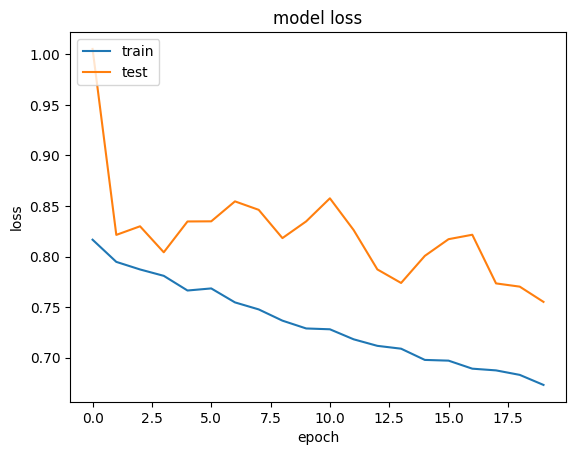

In [24]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Updating the batch size from 256 to 512**

Keeping the same epoch size = 20, learning rate= .001, Optimizer = RMSprop 

In [63]:
BATCH_SIZE = 512
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 535ms/step - accuracy: 0.8049 - loss: 0.5560 - val_accuracy: 0.7324 - val_loss: 0.8169
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 525ms/step - accuracy: 0.8068 - loss: 0.5486 - val_accuracy: 0.7282 - val_loss: 0.8674
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 507ms/step - accuracy: 0.8007 - loss: 0.5593 - val_accuracy: 0.7287 - val_loss: 0.8616
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 513ms/step - accuracy: 0.8130 - loss: 0.5362 - val_accuracy: 0.7325 - val_loss: 0.8188
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 505ms/step - accuracy: 0.8124 - loss: 0.5427 - val_accuracy: 0.7551 - val_loss: 0.7564
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 521ms/step - accuracy: 0.8156 - loss: 0.5305 - val_accuracy: 0.7408 - val_loss: 0.8038
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 502ms/step - accuracy: 0.8107 - loss: 0.5297 - val_accuracy: 0.7316 - val_loss: 0.8688
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 501ms/step - accuracy: 0.8122 - loss: 0.5281 - val_accu

**Adding one more layer** 

This will augment the number of parameters in the model. This expansion will empowers the model to embody more complex functions and discern intricate patterns within the data.
Batch Size = 256, Epoch Size = 20, learning rate =.001, Optimizer = RMSprop

In [95]:
BATCH_SIZE = 256
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.33))

model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


c:\Users\Win10\Desktop\python_projects\MLP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_121 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_122 (Activation)     │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_123 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_124 (Activation)     │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_125 (Activation)     │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_126 (Activation)     │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_127 (Activation)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_128 (Activation)     │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,341,226 (5.12 MB)

 Trainable params: 1,341,226 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 96s 585ms/step - accuracy: 0.1575 - loss: 2.2413 - val_accuracy: 0.3397 - val_loss: 1.9312
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 570ms/step - accuracy: 0.3240 - loss: 1.8597 - val_accuracy: 0.3860 - val_loss: 1.7018
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 570ms/step - accuracy: 0.4028 - loss: 1.6326 - val_accuracy: 0.4789 - val_loss: 1.4209
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 94s 600ms/step - accuracy: 0.4669 - loss: 1.4635 - val_accuracy: 0.5383 - val_loss: 1.2996
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 91s 580ms/step - accuracy: 0.5262 - loss: 1.3283 - val_accuracy: 0.5654 - val_loss: 1.2007
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 573ms/step - accuracy: 0.5674 - loss: 1.2194 - val_accuracy: 0.5599 - val_loss: 1.2565
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 91s 582ms/step - accuracy: 0.6021 - loss: 1.1237 - val_accuracy: 0.5860 - val_loss: 1.1675
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 574ms/step - accuracy: 0.6334 - loss: 1

**Updating the EPOCH size from 20 to 40**

keeping the batch_size =256 and learning rate =.001 and optimizer = RMSprop**

In [78]:
N_EPOCH = 40
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 532ms/step - accuracy: 0.8074 - loss: 0.5598 - val_accuracy: 0.7492 - val_loss: 0.7899
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 566ms/step - accuracy: 0.8082 - loss: 0.5451 - val_accuracy: 0.7767 - val_loss: 0.6740
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 574ms/step - accuracy: 0.8153 - loss: 0.5269 - val_accuracy: 0.7800 - val_loss: 0.6550
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 564ms/step - accuracy: 0.8263 - loss: 0.4977 - val_accuracy: 0.7907 - val_loss: 0.6301
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 92s 586ms/step - accuracy: 0.8344 - loss: 0.4769 - val_accuracy: 0.7956 - val_loss: 0.6166
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 573ms/step - accuracy: 0.8342 - loss: 0.4780 - val_accuracy: 0.7912 - val_loss: 0.6449
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 564ms/step - accuracy: 0.8416 - loss: 0.4577 - val_accuracy: 0.7797 - val_loss: 0.6889
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 91s 580ms/step - accuracy: 0.8425 - loss: 0

**Changing the optimizer from RMSpro to SGD**

keeping the same learning rate 0.01, batch_size = 256 and epoch size = 40

In [98]:
# training/fitting of the complex DNN model
N_EPOCH = 40
OPTIM = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 540ms/step - accuracy: 0.3345 - loss: 1.8572 - val_accuracy: 0.4214 - val_loss: 1.6070
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 93s 590ms/step - accuracy: 0.4341 - loss: 1.5423 - val_accuracy: 0.5196 - val_loss: 1.3433
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 562ms/step - accuracy: 0.4800 - loss: 1.4216 - val_accuracy: 0.5439 - val_loss: 1.2661
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 573ms/step - accuracy: 0.5059 - loss: 1.3560 - val_accuracy: 0.5710 - val_loss: 1.2111
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 571ms/step - accuracy: 0.5354 - loss: 1.2886 - val_accuracy: 0.5908 - val_loss: 1.1473
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 91s 576ms/step - accuracy: 0.5574 - loss: 1.2295 - val_accuracy: 0.5933 - val_loss: 1.1237
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 549ms/step - accuracy: 0.5772 - loss: 1.1859 - val_accuracy: 0.6360 - val_loss: 1.0294
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 92s 588ms/step - accuracy: 0.5952 - loss: 1

**Adding Batch Normalization to stabilize the learning and accelerate the learning process.**

Batch Size =256, Epoch size = 40, Optimizer = SGD, learning rate = 0.01

In [100]:
BATCH_SIZE = 256
N_EPOCH = 40
OPTIM = SGD(learning_rate=0.01, momentum=0.9)
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.33))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

c:\Users\Win10\Desktop\python_projects\MLP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_91 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_129 (Activation)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 512)            │             

 Total params: 1,343,018 (5.12 MB)

 Trainable params: 1,342,122 (5.12 MB)

 Non-trainable params: 896 (3.50 KB)

**Evaluating the model with Batch Nomalization**

In [101]:
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 135s 829ms/step - accuracy: 0.2696 - loss: 2.4642 - val_accuracy: 0.1571 - val_loss: 2.8083
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 869ms/step - accuracy: 0.4411 - loss: 1.5123 - val_accuracy: 0.2915 - val_loss: 2.1364
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 877ms/step - accuracy: 0.5093 - loss: 1.3408 - val_accuracy: 0.4156 - val_loss: 1.7981
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 847ms/step - accuracy: 0.5579 - loss: 1.2251 - val_accuracy: 0.5934 - val_loss: 1.1242
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 135s 862ms/step - accuracy: 0.5923 - loss: 1.1362 - val_accuracy: 0.5202 - val_loss: 1.4202
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 849ms/step - accuracy: 0.6125 - loss: 1.0749 - val_accuracy: 0.6303 - val_loss: 1.0790
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 841ms/step - accuracy: 0.6370 - loss: 1.0048 - val_accuracy: 0.6459 - val_loss: 1.0155
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 839ms/step - accuracy: 0.6630 -

**Compiling the Batch Nomalization model with optimizer RMSprop**

In [102]:
BATCH_SIZE = 256
N_EPOCH = 40
OPTIM = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_91 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_129 (Activation)     │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 512)            │             

 Total params: 1,343,018 (5.12 MB)

 Trainable params: 1,342,122 (5.12 MB)

 Non-trainable params: 896 (3.50 KB)

**Evaluating Batch Nomalization model with optimizer RMSprop**

In [103]:
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 128s 786ms/step - accuracy: 0.8235 - loss: 0.5194 - val_accuracy: 0.7857 - val_loss: 0.6538
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 134s 855ms/step - accuracy: 0.8293 - loss: 0.4938 - val_accuracy: 0.8073 - val_loss: 0.5878
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 130s 826ms/step - accuracy: 0.8349 - loss: 0.4733 - val_accuracy: 0.8006 - val_loss: 0.6366
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 831ms/step - accuracy: 0.8400 - loss: 0.4648 - val_accuracy: 0.8084 - val_loss: 0.6193
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 846ms/step - accuracy: 0.8499 - loss: 0.4431 - val_accuracy: 0.8301 - val_loss: 0.5473
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 837ms/step - accuracy: 0.8510 - loss: 0.4307 - val_accuracy: 0.8105 - val_loss: 0.6115
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 823ms/step - accuracy: 0.8540 - loss: 0.4234 - val_accuracy: 0.8051 - val_loss: 0.6571
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 845ms/step - accuracy: 0.8636 -

**Adding data augmentation**

Data augmentation encompasses duplicating examples in the training dataset with slight random alterations. As the dataset consists of small object photos, it's imperative to avoid augmentations that overly distort the images, ensuring valuable features remain intact. Beneficial random augmentations may include horizontal flips, minor image shifts, and potentially slight zooming or cropping. We will examine the impact of basic augmentation on the baseline image, specifically horizontal flips, along with 10% shifts in both height and width.

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterator
it_train = datagen.flow(input_X_train, output_Y_train, batch_size=64)
# fit model
steps = int(input_X_train.shape[0] / 64)
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
# evaluate model
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 865ms/step - accuracy: 0.9381 - loss: 0.1804 - val_accuracy: 0.8522 - val_loss: 0.6305
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 134s 856ms/step - accuracy: 0.9394 - loss: 0.1764 - val_accuracy: 0.8521 - val_loss: 0.6450
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 881ms/step - accuracy: 0.9381 - loss: 0.1774 - val_accuracy: 0.8565 - val_loss: 0.6436
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 135s 859ms/step - accuracy: 0.9385 - loss: 0.1791 - val_accuracy: 0.8542 - val_loss: 0.6439
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 134s 852ms/step - accuracy: 0.9406 - loss: 0.1702 - val_accuracy: 0.8547 - val_loss: 0.6587
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 841ms/step - accuracy: 0.9377 - loss: 0.1805 - val_accuracy: 0.8537 - val_loss: 0.6808
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 823ms/step - accuracy: 0.9416 - loss: 0.1742 - val_accuracy: 0.8473 - val_loss: 0.6921
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 850ms/step - accuracy: 0.9425 -

**Visualizing the performance**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


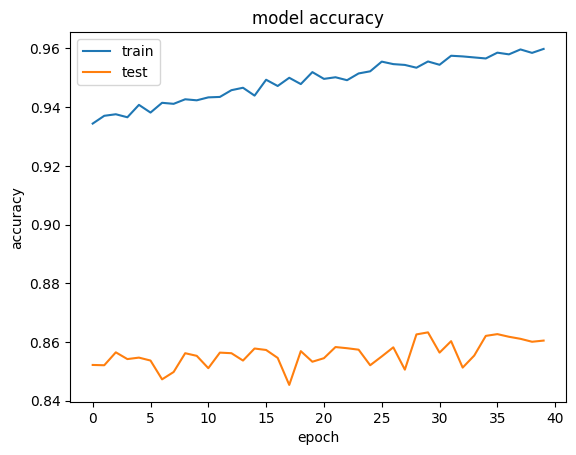

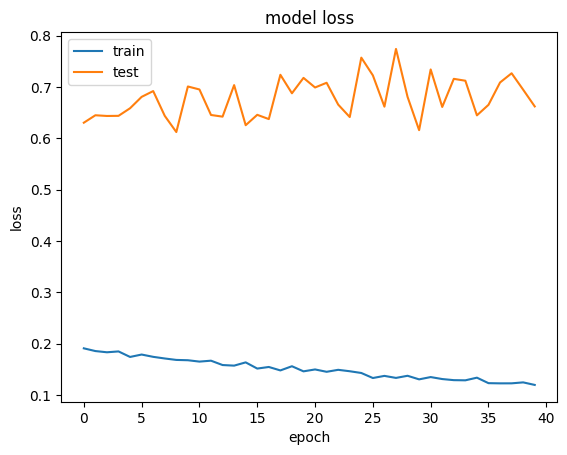

In [105]:
#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Increasing the dropout rate and decreasing the number of neurons as the model was overfitting the training data**

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 256
N_EPOCH = 40
OPTIM = RMSprop()
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()


# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterator
it_train = datagen.flow(input_X_train, output_Y_train, batch_size=64)
# fit model
steps = int(input_X_train.shape[0] / 64)
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
# evaluate model
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

c:\Users\Win10\Desktop\python_projects\MLP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_97 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_131 (Activation)     │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 128)            │             

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.2196 - loss: 2.6609 - val_accuracy: 0.0952 - val_loss: 3.7693
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 122s 778ms/step - accuracy: 0.4157 - loss: 1.6111 - val_accuracy: 0.1635 - val_loss: 3.4492
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 820ms/step - accuracy: 0.5109 - loss: 1.3763 - val_accuracy: 0.3479 - val_loss: 2.0022
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 841ms/step - accuracy: 0.5723 - loss: 1.2149 - val_accuracy: 0.6040 - val_loss: 1.1540
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 811ms/step - accuracy: 0.6202 - loss: 1.0912 - val_accuracy: 0.6526 - val_loss: 1.0048
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 132s 838ms/step - accuracy: 0.6526 - loss: 0.9978 - val_accuracy: 0.6666 - val_loss: 0.9372
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 130s 830ms/step - accuracy: 0.6740 - loss: 0.9419 - val_accuracy: 0.6759 - val_loss: 0.9580
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 131s 835ms/step - accuracy: 0.6938 - lo

**Visualizing the performance**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


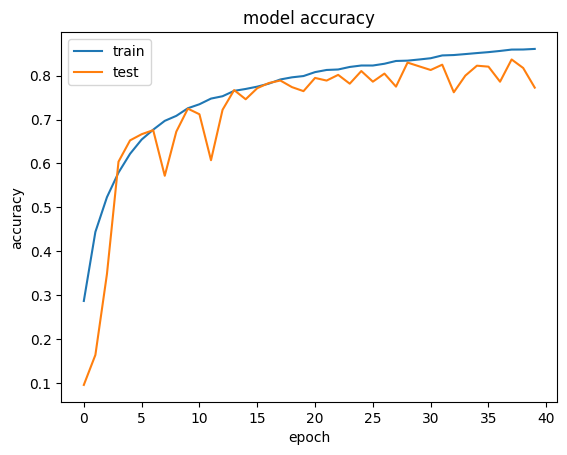

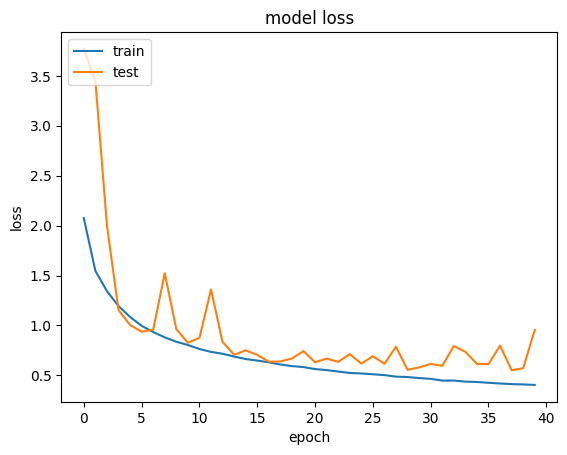

In [107]:
#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion**

We can delve into adjusting additional hyperparameters to further enhance the accuracy of the CNN model.